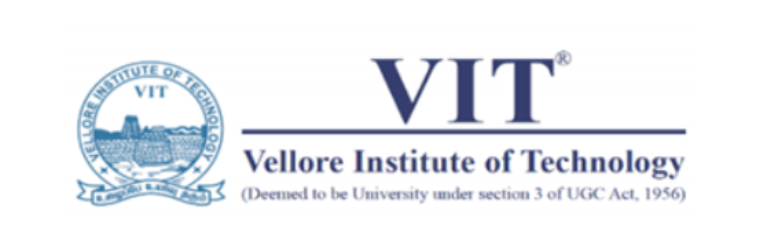
SCHOOL OF COMPUTER SCIENCE ENGINEERING <br>
FALL SEMESTER 2021-2022 <br>
                                     
NAME: Valliammai.V <br>
REG NO: 19MID0124 <br>
COURSE CODE: MDI4001 <br>
FACULTY: Dr.ABDUL GAFFAR H<br>  
SUBJECT: Machine Learning for Data Science (ELA)<br> 
ASSIGNMENT NO: 5<br>


## Questions:
#### Train SVM classifier using sklearn digts dataset (e. from sklearn.datasets import load_digits) and then,   

#### 1. Now do some exploratory data analysis to figure out how data are linearly/non linearly separable  

#### 2. Measure accuracy of your model using RBF kernel.  

#### 3. Tune your model further using regularization and gamma parameters and try to come up with highest accuracy score.  

#### 4. Use 80% of samples as training data size

##### Importing libraries

In [1]:
import pandas as pd
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.datasets import load_digits


#### loading dataset

In [2]:
digit = load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digit_df = pd.DataFrame(digit.data)
digit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
digit_df.shape

(1797, 64)

In [5]:
digit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [6]:
digit_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [7]:
digit.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

##### visualising digit

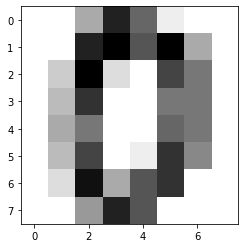

In [8]:
some_digit=np.array(digit_df.iloc[0])
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("on")
plt.show()

#### since 64 rows we have to reduce to 2 or 3 dimension to visualise
###### so using pcs and manifold to visualise

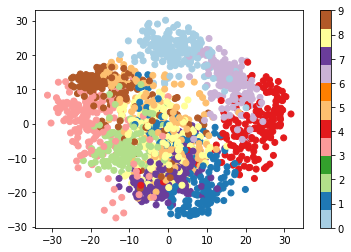

In [9]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digit.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digit.target, cmap="Paired")
plt.colorbar()

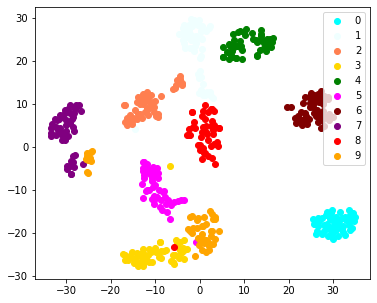

In [10]:
from sklearn.manifold import TSNE
X = digit.data[:500]
y = digit.target[:500]
 
tsne = TSNE(n_components=2, random_state=0)
 
X_2d = tsne.fit_transform(X)
 
digits_ids = range(len(digit.target_names))
 
plt.figure(figsize=(6, 5))
colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digit.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

##### conclusion
###### It is not linearly seperable

### reshaping the datasets

In [11]:
n_samples = len(digit.images)
X = digit.images.reshape(digit_df.shape)
#print(x)
y= digit.target

#### spliting data into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 47)

### model of svc using paramemters kernel='rbf',gamma=0.005,C=0.4

In [13]:
clf = SVC(kernel='rbf',gamma=0.005,C=0.4) 
print("The model:\n", pd.DataFrame.from_dict(clf.get_params(),orient ='index'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

The model:
                              0
C                          0.4
break_ties               False
cache_size                 200
class_weight              None
coef0                      0.0
decision_function_shape    ovr
degree                       3
gamma                    0.005
kernel                     rbf
max_iter                    -1
probability              False
random_state              None
shrinking                 True
tol                      0.001
verbose                  False




[[30  0  0  0  0  0  0  0  2  0]
 [ 0 31  0  0  0  0  0  0  2  0]
 [ 0  0 30  0  0  0  0  0  6  0]
 [ 0  0  0 27  0  0  0  0  2  0]
 [ 0  0  0  0 41  0  0  0  4  0]
 [ 0  0  0  0  0 40  0  0  2  1]
 [ 0  0  0  0  0  0 39  0  3  0]
 [ 0  0  0  0  0  0  0 27  2  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  2 33]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       1.00      0.94      0.97     

#### accuracy of previous model is 92.77%
#### so now model is
#### model of svc using paramemters kernel='rbf',gamma=0.005,C=14

In [14]:
clf = SVC(kernel='rbf',gamma=0.005,C=14) 
print("The model:\n", pd.DataFrame.from_dict(clf.get_params(),orient ='index'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

The model:
                              0
C                           14
break_ties               False
cache_size                 200
class_weight              None
coef0                      0.0
decision_function_shape    ovr
degree                       3
gamma                    0.005
kernel                     rbf
max_iter                    -1
probability              False
random_state              None
shrinking                 True
tol                      0.001
verbose                  False




[[32  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  1  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  2  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  0  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00     

In [15]:
#### accuracy of previous model is 98.05%
#### so now model is
#### model of svc using paramemters kernel='rbf',gamma=0.014,C=1.0

In [16]:
clf = SVC(gamma=0.0014,kernel='rbf',C=1.0) 
print("The model:\n", pd.DataFrame.from_dict(clf.get_params(),orient ='index'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

The model:
                               0
C                           1.0
break_ties                False
cache_size                  200
class_weight               None
coef0                       0.0
decision_function_shape     ovr
degree                        3
gamma                    0.0014
kernel                      rbf
max_iter                     -1
probability               False
random_state               None
shrinking                  True
tol                       0.001
verbose                   False




[[32  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.0

#### visualising confusion matrix

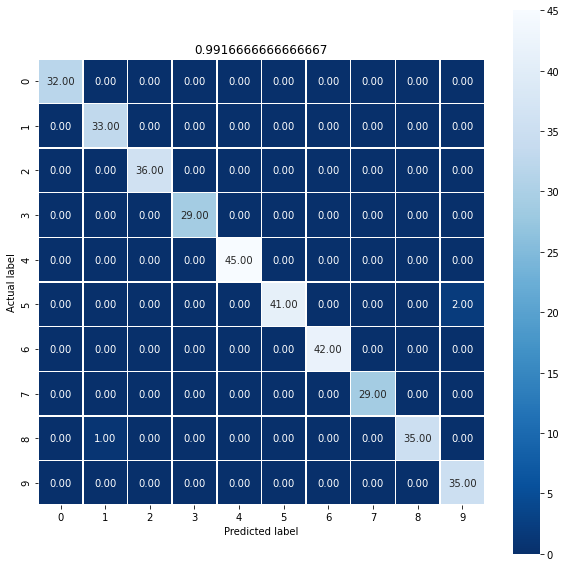

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion , annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(metrics.accuracy_score(y_test, y_pred), size = 12)
plt.show()